# Using memmap
Most of the times you will have to deal with data sets that are to big to fit in RAM. The solution to manipulating those is to use numpy.memmmap. That function gives you a pointer to memory in the hard disk where your data lives but is treated by numpy as a normal array.
The thing with memmap arrays is that if you pass them to functions that do array manipulation then numpy will try to load the whole array in RAM. That will crash your computer. So manipulating such arrays needs to be done in parts (think loops). The trick here is to do this as efficiently as possible.

## Random matrix and its covariance. Difficulty 2/5
Let's start by setting up the problem. You will understand what the covariance function of numpy does by recreating it and runnign it on small arrays. This will give you an idea of how much slower the naive (loop based) approach is to the highly optimized numpy (vectorized) approach.

1. Generate a random elements matrix with 1000 rows (the samples) and 100 columns (the dimensions).

2. Calculate the covariance of this matrix using numpy.cov

3. Time this

4. Make some pairs of the matrix samples partially correlated<sup>*</sup> with each other. Create 200 such pairs (they should be randomly placed in the matrix but the relative position of the two samples in a pair can be either random or fixed). 

5. Report some covariances of the two matrices that show that on the pairs of samples you have chossen to increase the covariance that has happened.

Notes:

1. <sup>*</sup> To get perfect covariance then two samples would have to be identical (i.e. just copy one sample to the place of another). To get partial covariance one sample would have to be a little bit different to the other. That can be achieved by multiplying a copied sample's elements with random numbers that are close to one.

2. Do not use loops for any of the above. Everything should be achieved with numpy.

## Calculate the covariance of the same matrices using a multiple loop. Difficulty 3/5

Now try and calulate the covariance by the most naive, loop based way possible.

Have a look [here](http://stattrek.com/matrix-algebra/covariance-matrix.aspx) for a quick review of covariance

Do things one element at a time and use as little numpy as possible (use it to calculate the row means)

Check that the results of np.cov and your results are the same (print the mean of the square difs)

Time how long that takes

## Generate a large matrix (not fitting into RAM). Difficulty 1/5

Use numpy.memmap to create a matrix whose elements are kept in the hard disk and not in RAM and that is so large that keeping it into RAM would be impossible.
Make the matrix 10<sup>5</sup> x 10<sup>5</sup> elements. 

Fill this with random numbers.

How much memory will that take? What else do you need to know to calculate the memory it will occupy other than its size?


## Calculate the covariance of this matrix. Difficulty 5/5 (this is hard, do your best)
Calulate the covariance of this matrix using
1. The np.cov straight on the memmaped matrix. What happens?
2. An as fast as possible loop (mix numpy vectorization and loops as you see fit to get the fastest possible result). To be as efficient as possible you might need to know how much RAM your system has so as to load as much as possible into memory thus minimizing your number of loop itterations. Use the psutil.virtual_memory() function (you might have to install the psutil library).

Time how long your covariance function takes.

Note:

In order to develop your new covariance function that opperates on memmaped arrays use first some small memmaped matrices that you can do fast itterations of debuging on. While you are developing make sure that the covariance of any small matrix as calculated by np.cov is the same as the one you calculate. Also time both the np.cov function and your function on different size matrices to get a feel of how much worse you are doing and how that difference increases with matrix size. Once you are sure that everything works then run your function on the very large matrix.

Make sure your function has print statements that allow you to follow its progress. It is very usefull to know if your function is running at all when it is expected to take a very long time to complete.

# Brief intro to Pandas
Pandas is a package that makes it very easy to manipulate data sets with different labels. It's main data structures (DataFrame) are closer to excel spreadsheets and data bases than to numpy arrays. That allows you to book keep your complex data sets in intuitive ways and more importanlty to query your data (eg. Give me all the voltage timeseries for the trials where the animal was running faster than 3m/s).

Pandas is extremely powerfull and this is a very basic introduction to it. For a  little bit more have a look [here](https://pandas.pydata.org/pandas-docs/version/0.22.0/10min.html).

## Load some data into pandas DataFrames. Difficulty 2/5
Load the Events.csv and the Video.csv into Pandas DataFrames (create two seperate DataFrames).
The events file has the x, y position of a ball moving on a table, bouncing around walls. The time stamps of this file are the times that the calculation of the position of the ball happened. The video csv has the frame number of the camera recording the ball. The timestamps are the times that each frame was saved.

Use the sep parameter of the pandas.read_csv funtion to import only the date/time, the name, the x position and the y position for the events and only the date/time and the frame number for the video file. Use the read_csv function to also get pandas to transform the date/time strings into Timestamp.

The resulting DataFrames should have appropriately named columns and the data in each column should be of the correct type (Timestamp for the date/times, string for the name of the event, numbers (floats and ints) for the positions and the frame numbers).


In [2]:
import numpy as np
import pandas as pd
import os.path as path

base_folder = r'E:\Code\Mine\pystarters_scientific_computing'
events_file = path.join(base_folder, 'Events.csv')
video_file = path.join(base_folder, 'Video.csv')


events_df = pd.read_csv(events_file, sep="\+01:00| |\(|\)|,", engine='python', header=None,
                        names=['Time','Type', 'X', 'Y'], usecols=[0,2,4,6], parse_dates=[0], infer_datetime_format=True)

video_df = pd.read_csv(video_file, sep='\+01:00', engine='python', header=None, names=['Time', 'Frame'],
                       usecols=[0, 1], parse_dates=[0], infer_datetime_format=True)




## Merge the two DataFrames into a single one. Difficulty 3/5
Create a 3rd DataFrame that is the logical merge of the two DataFrames above. Keep only the 'common' rows. Use the rows that are closer in time between the events and the video frames.

If you turn the date/time into indices then turn them back to normal column.

The final DataFrame should have 5 columns, Time, Frame, Type, X, Y (with those or any other names you find appropriate).

In [3]:
events_df = events_df.set_index('Time')
video_df = video_df.set_index(('Time'))

partial_video_reindexed = video_df.reindex(events_df.index, method='nearest')

events_with_frame_df = pd.merge(partial_video_reindexed, events_df, left_index =True, right_index=True)

events_df.reset_index(level=0, inplace=True)
video_df.reset_index(level=0, inplace=True)
events_with_frame_df.reset_index(level=0, inplace=True)

## Plot the positions of the ball. Difficult 1/5
Plot all the 2d positions of the ball so that you can see its trajectory

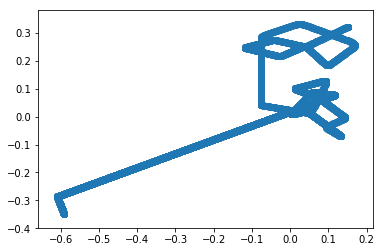

In [6]:
import matplotlib.pyplot as plt

plt.scatter(events_df['X'], events_df['Y'])

## Create direction columns. Difficulty 2/5
Create a new column ('Direction') that records the angle (in degrees) of the movement of the ball in each frame.

To check your result redo the previous plot but now colour code each position with its direction.

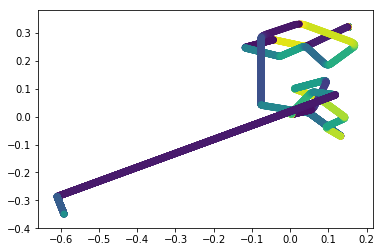

In [7]:
events_with_frame_and_dir_df = events_with_frame_df
events_with_frame_and_dir_df['Direction'] = ''

dx = np.append(np.diff(events_with_frame_df['X']), 0)
dy = np.append(np.diff(events_with_frame_df['Y']), 0)

angle = np.rad2deg(np.arctan2(dy,dx))

events_with_frame_and_dir_df['Direction'] = angle

plt.scatter(events_df['X'], events_df['Y'], c=angle)

## Create a DataFrame that has only the info of frames where there is a direction change. Difficulty 1/5
To check the result plot these points on top of the previous scatter plot (but bigger and red)

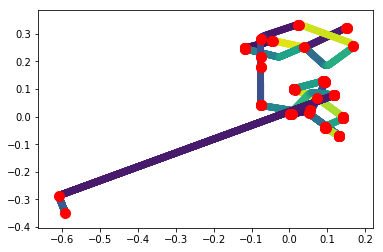

In [9]:
events_with_frame_and_dir_df['DirectionChange'] = np.append(np.diff(events_with_frame_and_dir_df['Direction']), 0)

events_with_dir_change = events_with_frame_and_dir_df[np.abs(events_with_frame_and_dir_df['DirectionChange']) > 5]

plt.scatter(events_df['X'], events_df['Y'], c=angle)
plt.scatter(events_with_dir_change['X'], events_with_dir_change['Y'], s=100, c='r')